# Introduction to Machine Learning

This week, we'll begin working with machine learning. First, we are going to talk about the objective of machine learning and then discuss the involved terminology. To this end, we'll utilize one of the simplest algorithms in the field, named *kNN* to serve as an example.

<image width="500" height="300" src="https://i.imgur.com/vn9NUkD.png"></image>

In addition, we'll also be talking about [sklearn](https://scikit-learn.org/stable/), a Python library specialized for machine learning.

## What is Machine Learning?

> **A set of methods that can automatically detect patterns in data,  and then use the uncovered patterns to predict future data, or to perform other kinds of decision making under uncertainty**.
*Murphy K.P. Machine Learning A Probabilistic Perspective.*

Typically, our goal is to use the data to develop models that we can use to predict various outcomes for new data, such as:

- Predicting whether an email message is spam or not

- Predicting whether a credit card transaction is fraudulent

- Predicting which advertisement a shopper is most likely to click on



## Key Terms

- **Instance (Observation)**: The thing about which you want to make a prediction.

- **Example**: An instance (with its features) and a label.

- **Label**: A label is the thing we're predicting.

- **Feature**: A feature is an input variable. A simple machine learning project might use a single feature, while a more sophisticated machine learning project could use millions of features. Features are the inputs to be fed to the models.

- **Model**: A statistical representation of a prediction task. You train a model on examples then use the model to make predictions.

Obtained from [[Google Guidelines](https://developers.google.com/machine-learning/guides/rules-of-ml/)]

## Supervised vs Unsupervised

Within the field of machine learning, there are two main types of tasks: **supervised**, and **unsupervised**. The main difference between the two types is that supervised learning is performed by utilizing the ground truth, or in other words, we have prior knowledge of what the output values for our samples should be. Therefore, **the goal of supervised learning is to learn a function, given a set of observations and associated outputs, that best approximates the relationship, mapping between them**.

Unsupervised learning, on the other hand, does not have labeled data, so **its goal is to infer the natural structure present within a set of data points**.

## Supervised Learning

Supervised learning is typically done in the context of classification, when we want to map input to output labels, or regression, when we want to map inputs to a continuous output.

- Classification models:



What classification models aim to achieve can be summarized above. It is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.
- Regression models:



It is the task of approximating a mapping function (f) from input variables (X) to a **continuous output variable (y).** A continuous output variable is a real-value, such as an integer or floating point value. These are often quantities, such as amounts and sizes.

## k-Nearest Neighbors

kNN is a simple, yet a powerful machine learning algorithm. The main idea behind kNN is to check the surroundings of the given instance. It's a supervised algorithm and can be used in both classification and regression. It simply calculates the distance of a new data point to all other training data points. It then selects the K-nearest data points, where K can be any integer. Finally, it assigns the data point to the class to which the majority of the K data points belong.

Here, K is a **hyperparameter**. A hyperparameter is a parameter of your model that is set before the training.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)



**kNN Pseudocode**


1. Load the data
2. Initialise the value of k
3. Calculate the distance between the test data and each row of training data.
4. Sort the calculated distances in ascending order based on distance values
5. Get top k rows from the sorted array
6. Get the most frequent class of these rows
7. Return the predicted class


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [2]:
def create_2D_sample(mean, std, n, label):
  """
  given a set of sample parameters
  returns a 2D sample
  """
  # create data points
  xvals = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)
  yvals = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)

  # class labels
  labels = np.repeat(label, n).reshape(-1,1)

  # merge observations and assigned labels
  sample = np.hstack([xvals, yvals, labels])

  return sample

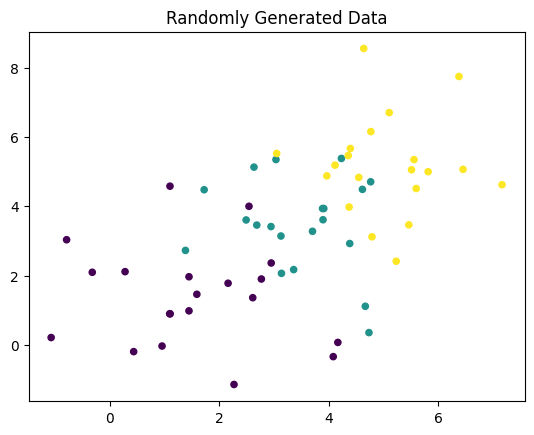

In [3]:
# number of observations
n = 20
# number of classes
n_classes = 3
# fix the random seed
np.random.seed(42)

# sample parameters
means = [1.8, 3.5, 5.1]
stds = [1.5, 1.2, 1.4]

d = []
for label in range(n_classes):
  sample = create_2D_sample(means[label], stds[label], n, label)
  d.append(sample)

data = np.vstack(d)

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.title("Randomly Generated Data")
plt.show()

Now, let's apply kNN with different *k* values. To this end, we are going to utilize a new library named *sklearn* to employ various machine learning models. It's essential for you to understand and effectiely utilize sklearn and its functionalities. Please check the tutorials below and practice on your own.

- https://scikit-learn.org/stable/tutorial/index.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

**Sklearn Structure**

![](https://i.imgur.com/p7X0i2E.png)

**Model Life Cycle**

![](https://i.imgur.com/HPKXgs2.png)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# set the hyperparameter k
k=2
# generate the model
model = KNeighborsClassifier(k, metric="euclidean")

# extract features and labels from the data
features = data[:, :2]
labels = data[:, 2]

# fit data
model.fit(features, labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Now, we have a model. Let's create a random data point and assign a label based on its neighbors.

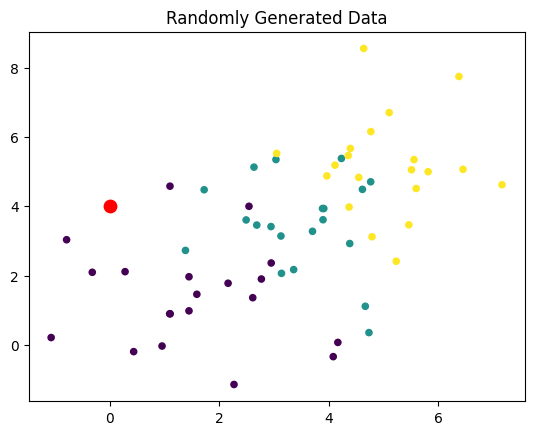

In [5]:
# new data point
d = np.array([[0,4]])

# let's visualize its location on the chart
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c="red")
plt.title("Randomly Generated Data")
plt.show()

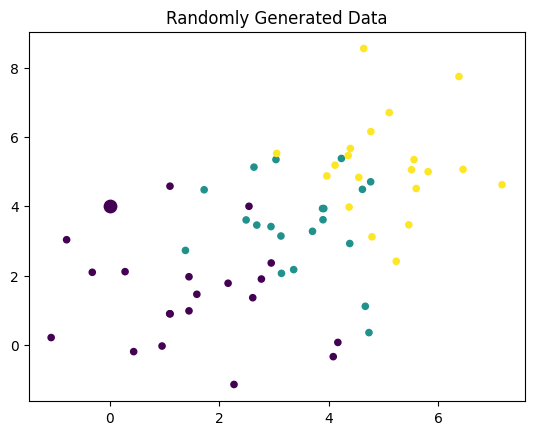

In [6]:
# now we can make the prediction
# pred is just another numpy array
# that stores the predicted labels
pred = model.predict(d)

# now let's also visualize the assigned color
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c=pred)
plt.title("Randomly Generated Data")
plt.show()

The model finds the closest two data points and assigns the label accordingly. As a result, the newly generated data point is assigned as label 0, color blue.

In addition, we can also visualize the boundaris for classifications.

In [7]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_knn(k):
  # generate the model
  model = KNeighborsClassifier(k)

  # extract features and labels from the data
  features = data[:, :2]
  labels = data[:, 2]

  # fit data
  model.fit(features, labels)

  step = 0.1

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  labels = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)]))

  # Put the result into a color plot
  labels = labels.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, labels, cmap=cmap_light)
  plt.scatter(data[:, 0], data[:, 1], c=data[:,2], cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

interact(visualize_knn, k=(1,10))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.visualize_knn(k)>

## Model Evaluation: Partitioning the Dataset

In a general machine learning pipeline, most of the models possess hyperparameters that shoudl be set before the training process begins. Depending on the value of the hyperparameter, the performance of your model would alter. So, how are we going to determine the value of hyperparameters?

#### Train, Validation & Test Dataset

Utilizing the entire dataset for both training and testing is a very harmful practice. Instead, partition your dataset into two folds, namely *training* and *testing*. With training dataset, you fit (train) your model and then test your model with the reserved test data which is never exposed to the model beforehand. So that your model's ability to predict unseen data will be tested. We are going to be talking about this issue in the upcoming weeks in detail.

<img height="250" width="500" src="https://i.stack.imgur.com/pXAfX.png"/>

In order to determine the optimal set of hyperparameters, you should further partition data. In this setting, in addition to the training and testing folds, you'll also need a *validation* set to *fine-tune the hyperparameters* in your model.

---

In summary:

**Train Dataset:** A sample of the actual data to be used for training your model. Your model will be learning from this set.


**Validation Dataset:** A sample from the actual data to be utilized for hyperparameter fine-tunning.

**Test Dataset:** The sample to evaluate your model's performance.

---


#### Partition Proportions

How are you going to split the dataset? How large should be each fold? These questions are most of the time context and dataset dependent. The size of your original dataset determines size of your split proportions. We'll be talking about these issues in the upcoming weeks.

As a general practise, most people use 80-10-10 or 70-15-15 proportions for splitting their datasets.

## Determining the Value of K

In the following exercise, we are going to utilize a very famous dataset named wine quality and apply kNN with hyperparameter tunning for K.

In [8]:
from sklearn import datasets

wine = datasets.load_wine()
cols = wine.feature_names + ["target"]
df = pd.DataFrame(np.hstack([wine.data, wine.target.reshape(-1,1)]), columns=cols)
df["target"] = df["target"].astype(int)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In this dataset, our goal is to predict the wine quality given a new set of wines. Here, we have 3 unique class labels.

In [9]:
df["target"].unique()

array([0, 1, 2])

#### Data Partitioning

First and foremost, you must separate your features and the label column. And then, split as you wish. Here, we are going to deploy 80-10-10 partitioning.

In [10]:
# separate features and the target column
X = df.drop("target", axis=1)
y = df["target"]

In [11]:
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

#### Evalution Criteria

Now, let's generate a set of values to be tested for the hyperparameter K. We're going to evalute each model with a metric named **accuracy score** which is specialized metric for classification problems as here.

``` py
>>> from sklearn.metrics import accuracy_score
>>> y_pred = [0, 2, 1, 3]
>>> y_true = [0, 1, 2, 3]
>>> accuracy_score(y_true, y_pred)
0.5
```

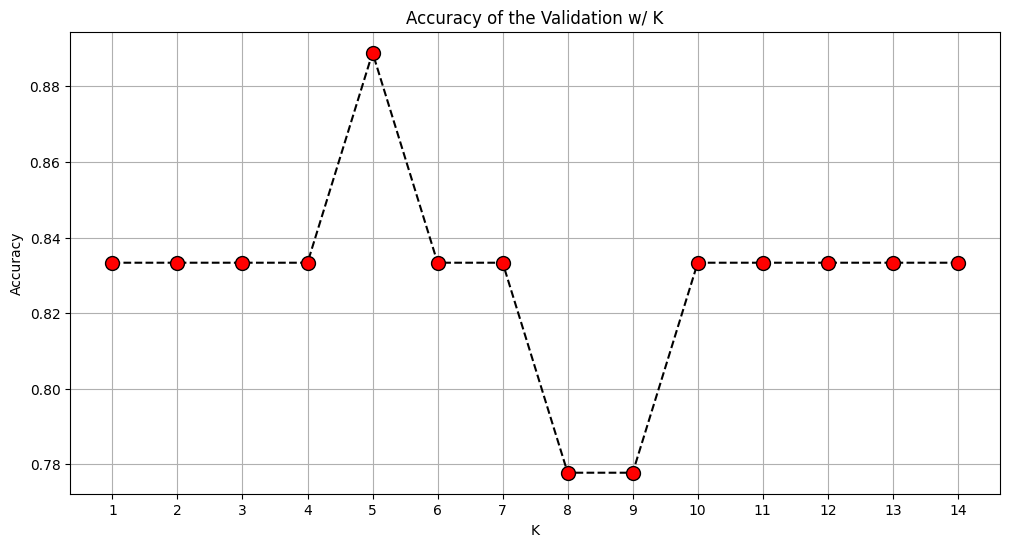

In [12]:
from sklearn.metrics import accuracy_score

K_range = np.arange(1, 15)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

The figure above shows that we obtain the maximum accuracy score when K is set to 5.

Now, we can observe the overall performance of the developed model with respect to the reserved test dataset.

In [13]:
# create a new model with current K
knn = KNeighborsClassifier(5, metric="euclidean")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
f"{accuracy_score(y_test, y_pred):.2f}"

'0.56'

As you can see, we obtained a much lower test accuracy value compared to the validation score. Since we randomly partition the data points into training, validation and test datasets, we may obtain varying metrics. In the upcoming weeks, we'll talk about more on the model evaluation and hyperparameter tunning.